In [3]:
# running module genes through KM curve analysis

import pandas as pd
import numpy as np
from scipy.stats import zscore
import gseapy as gp
from gseapy import Biomart 


In [70]:
myModule = pd.read_csv("Dox_Module_6")

In [71]:
myModule

,index,0
0,GJC1,6.572109
1,CDH13,6.488977
2,CALCRL,6.134830
3,RAMP2,6.320668
4,IKZF1,7.291824
...,...,...
127,CCNH,6.636388
128,TMEM183A,6.025834
129,LPXN,6.407676
130,HS2ST1,6.985093


In [72]:
glist = myModule.iloc[:,0].squeeze().str.strip().to_list()
print(glist[:10])

['GJC1', 'CDH13', 'CALCRL', 'RAMP2', 'IKZF1', 'SEMA3A', 'BTN2A2', 'CLEC10A', 'CIB2', 'OLFM4']


In [83]:
enr = gp.enrichr(gene_list=glist, # or "./tests/data/gene_list.txt",
                 gene_sets=['MSigDB_Hallmark_2020','KEGG_2021_Human',"NCI-60_Cancer_Cell_Lines"],
                 organism='human', # don't forget to set organism to the one you desired! e.g. Yeast, "GO_Biological_Process_2023", 
                 outdir=None, # don't write to disk , "NCI-60_Cancer_Cell_Lines",'Cancer_Cell_Line_Encyclopedia'
                )

TypeError: enrichr() missing 2 required positional arguments: 'gene_list' and 'gene_sets'

In [60]:
gp.get_library_name()

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'ChEA_2022',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019',
 'Descartes_Cell_Types_and_Tissue_2021',
 'Diabetes_Perturbations_GEO_2022',
 'DisGeNET',
 'Disease_

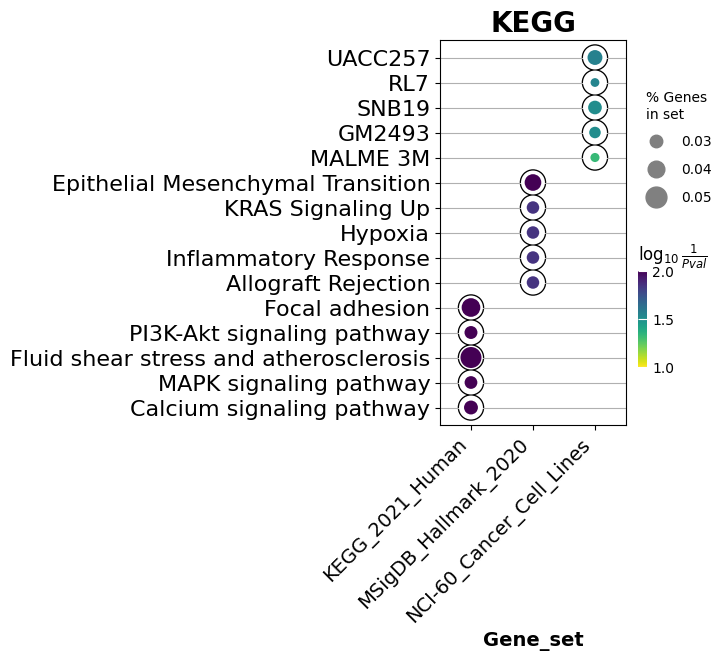

In [84]:
from gseapy import barplot, dotplot
ax = dotplot(enr.results,
              column="Adjusted P-value",
              x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
              size=50,
              top_term=5,
              figsize=(3,5),
              title = "KEGG",
              xticklabels_rot=45, # rotate xtick labels
              show_ring=True, # set to False to revmove outer ring
              marker='o',
             )

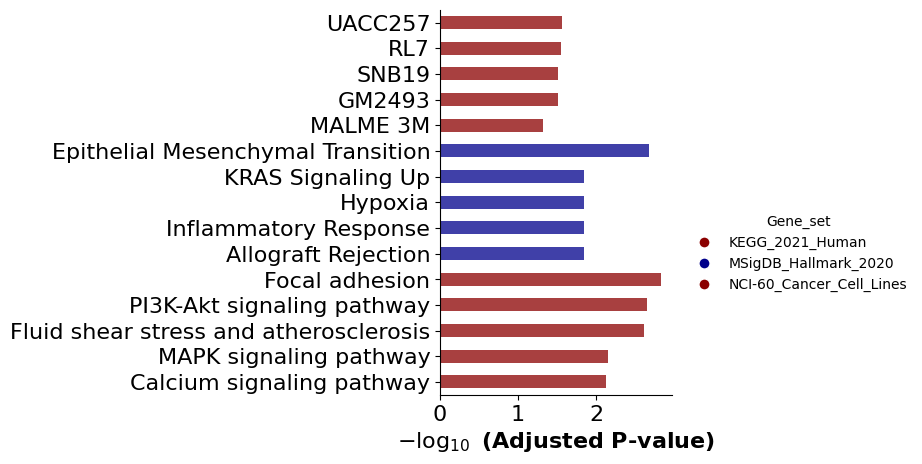

In [85]:
ax = barplot(enr.results,
              column="Adjusted P-value",
              group='Gene_set', # set group, so you could do a multi-sample/library comparsion
              size=50,
              top_term=5,
              figsize=(3,5),
              color=['darkred', 'darkblue'] # set colors for group
             )

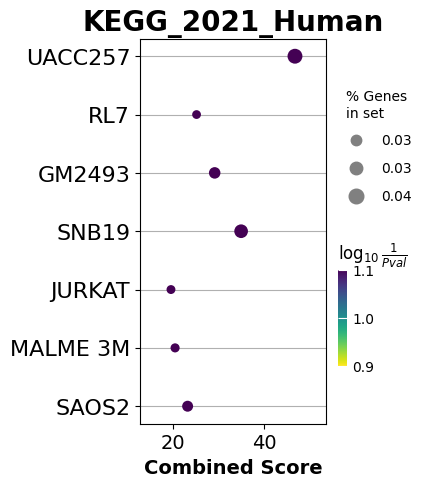

In [81]:
ax = dotplot(enr.res2d, title='KEGG_2021_Human',cmap='viridis_r', size=50, figsize=(3,5))


In [30]:
myModule.index = myModule['index']

In [32]:
myModule.drop(columns = ['index'], inplace = True)

In [86]:
rnk = myModule

In [88]:
rnk.index = rnk['index']

In [95]:
rnk.drop(columns = ['index'], inplace = True)


KeyError: "['index'] not found in axis"

In [99]:
rnk.sort_values(by = '0')
rnk.dtypes

0    float64
dtype: object

In [42]:
pre_res = gp.prerank(rnk= rnk,
                     gene_sets='KEGG_2016',
                     threads=4,
                     min_size=5,
                     max_size=1000,
                     permutation_num=1000, # reduce number to speed up testing
                     outdir=None, # don't write to disk
                     seed=6,
                     verbose=True # see what's going on behind the scenes)
                        )

2023-07-14 16:19:58,667 [INFO] Parsing data files for GSEA.............................
2023-07-14 16:19:58,668 [INFO] Enrichr library gene sets already downloaded in: /home/ndjed/.cache/gseapy, use local file
2023-07-14 16:19:58,683 [INFO] 0279 gene_sets have been filtered out when max_size=1000 and min_size=5
2023-07-14 16:19:58,684 [INFO] 0014 gene_sets used for further statistical testing.....
2023-07-14 16:19:58,685 [INFO] Start to run GSEA...Might take a while..................
2023-07-14 16:19:58,718 [INFO] Congratulations. GSEApy runs successfully................



In [44]:
pre_res.res2d.head(5)


,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,prerank,PI3K-Akt signaling pathway Homo sapiens hsa04151,0.423695,1.576962,0.046205,0.544373,0.247,10/11,53.03%,EGF;COL1A2;SYK;IKBKB;TEK;KDR;PDGFD;THBS2;FLT4;...
1,prerank,Lysosome Homo sapiens hsa04142,0.551181,1.456306,0.094139,0.507933,0.413,5/5,46.97%,MCOLN1;PPT1;CD68;LGMN;CTSS
2,prerank,Pathways in cancer Homo sapiens hsa05200,0.468313,1.428893,0.088889,0.387705,0.441,4/7,17.42%,EGF;RB1;GLI2;IKBKB
3,prerank,Ras signaling pathway Homo sapiens hsa04014,0.45173,1.390729,0.118151,0.348413,0.496,6/7,44.70%,EGF;IKBKB;TEK;KDR;PDGFD;FLT4
4,prerank,T cell receptor signaling pathway Homo sapiens...,0.514565,1.339129,0.162113,0.344769,0.56,3/5,17.42%,NCK1;PRKCQ;IKBKB


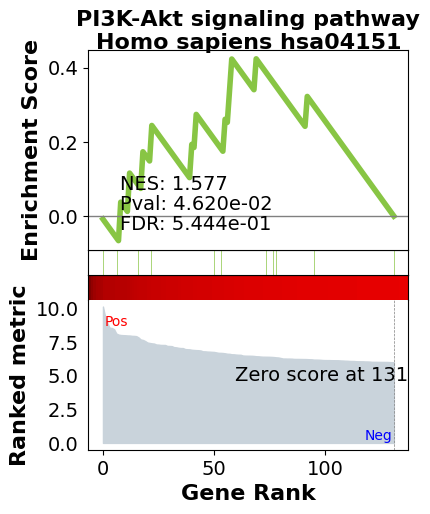

In [50]:
terms = pre_res.res2d.Term
axs = pre_res.plot(terms=terms[0])

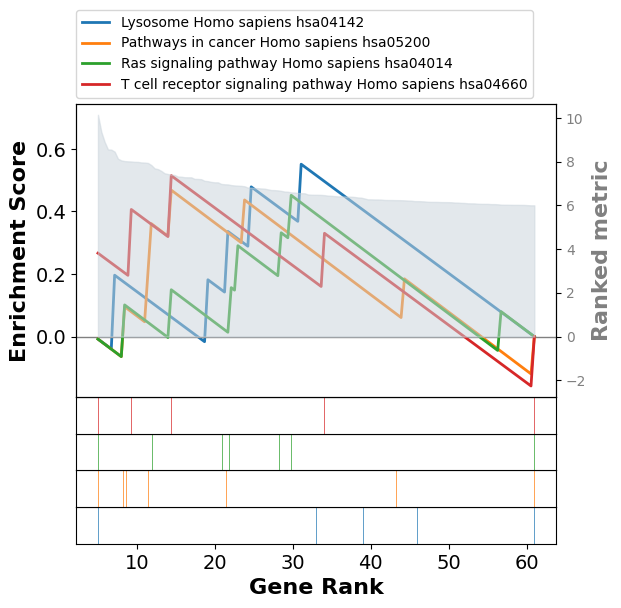

In [51]:
axs = pre_res.plot(terms=terms[1:5],
                   #legend_kws={'loc': (1.2, 0)}, # set the legend loc
                   show_ranking=True, # whether to show the second yaxis
                   figsize=(3,4)
                  )

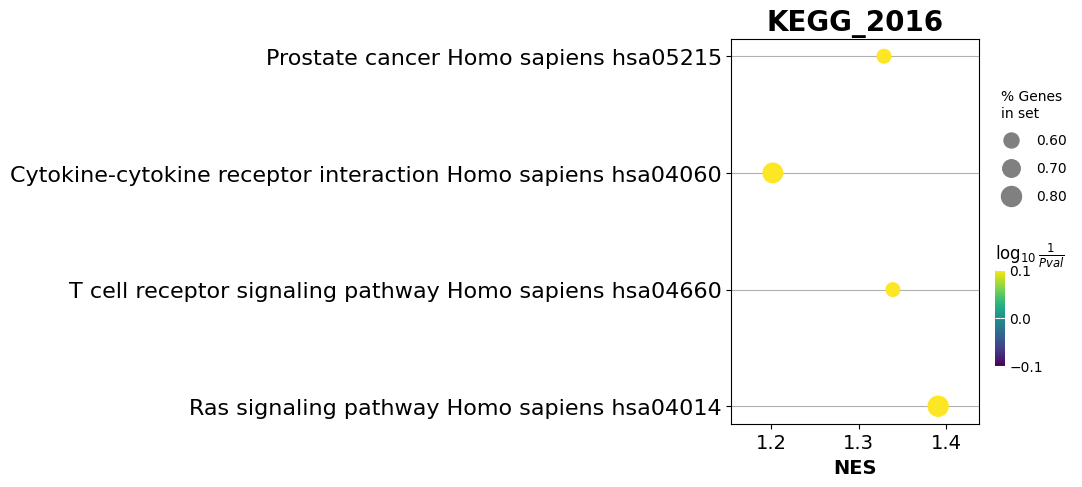

In [54]:
from gseapy import dotplot
import matplotlib.pyplot as plt
# to save your figure, make sure that ``ofname`` is not None
ax = dotplot(pre_res.res2d,
             column="FDR q-val",
             title='KEGG_2016',
             cmap=plt.cm.viridis,
             size=3, # adjust dot size
             figsize=(4,5), cutoff=0.35, show_ring=False)

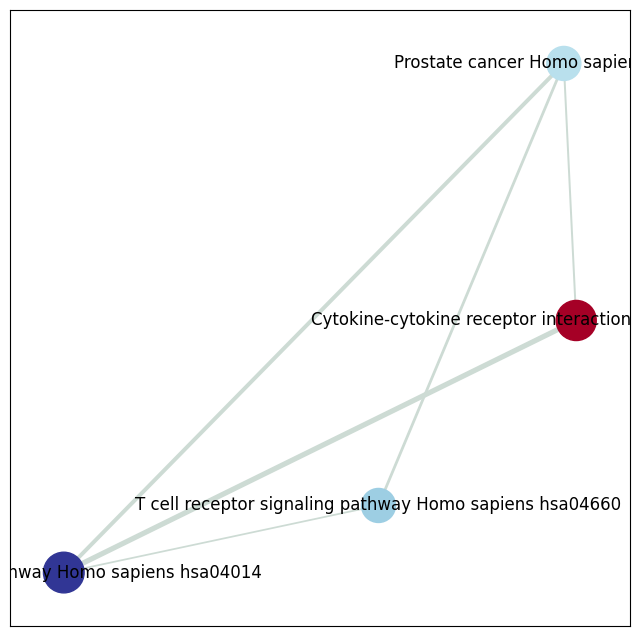

In [58]:
from gseapy import enrichment_map
# return two dataframe
nodes, edges = enrichment_map(pre_res.res2d, cutoff = 0.35)
import networkx as nx
# build graph
G = nx.from_pandas_edgelist(edges,
                            source='src_idx',
                            target='targ_idx',
                            edge_attr=['jaccard_coef', 'overlap_coef', 'overlap_genes'])
fig, ax = plt.subplots(figsize=(8, 8))

# init node cooridnates
pos=nx.layout.spiral_layout(G)
#node_size = nx.get_node_attributes()
# draw node
nx.draw_networkx_nodes(G,
                       pos=pos,
                       cmap=plt.cm.RdYlBu,
                       node_color=list(nodes.NES),
                       node_size=list(nodes.Hits_ratio *1000))
# draw node label
nx.draw_networkx_labels(G,
                        pos=pos,
                        labels=nodes.Term.to_dict())
# draw edge
edge_weight = nx.get_edge_attributes(G, 'jaccard_coef').values()
nx.draw_networkx_edges(G,
                       pos=pos,
                       width=list(map(lambda x: x*10, edge_weight)),
                       edge_color='#CDDBD4')
plt.show()

NameError: name 'gs_res' is not defined